In [55]:
import numpy as np
import json
import pandas as pd
from ast import literal_eval
import librosa
import keras

import matplotlib.pyplot as plt

In [2]:
data_path='mfcc_data.json'

In [3]:
with open(data_path, "r") as fp:
        data = json.load(fp)

In [4]:
X = np.array(data["mfcc"])
y = np.array(data["label"])

In [5]:
X.shape

(13533, 130, 13)

In [6]:
y.shape

(13533,)

In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [8]:
X_test.shape

(2707, 130, 13)

In [9]:
 model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu'),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu'),

        # 3rd dense layer
        keras.layers.Dense(64, activation='relu'),

        # output layer
        keras.layers.Dense(19, activation='softmax')
    ])

In [10]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [11]:
 model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               865792    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 19)                1235      
Total params: 1,014,803
Trainable params: 1,014,803
Non-trainable params: 0
_________________________________________________________________


In [12]:
 history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)


Train on 10826 samples, validate on 2707 samples
Epoch 1/50
10826/10826 [==============================] - 21s 2ms/step - loss: 12.7335 - accuracy: 0.3334 - val_loss: 2.2025 - val_accuracy: 0.3642
Epoch 2/50
10826/10826 [==============================] - 3s 322us/step - loss: 1.8656 - accuracy: 0.4625 - val_loss: 2.0131 - val_accuracy: 0.4052
Epoch 3/50
10826/10826 [==============================] - 3s 319us/step - loss: 1.6121 - accuracy: 0.5199 - val_loss: 1.4304 - val_accuracy: 0.6025
Epoch 4/50
10826/10826 [==============================] - 3s 318us/step - loss: 1.3834 - accuracy: 0.5993 - val_loss: 1.4799 - val_accuracy: 0.5611
Epoch 5/50
10826/10826 [==============================] - 3s 318us/step - loss: 1.2128 - accuracy: 0.6353 - val_loss: 1.3389 - val_accuracy: 0.6361
Epoch 6/50
10826/10826 [==============================] - 3s 322us/step - loss: 1.1853 - accuracy: 0.6503 - val_loss: 1.2328 - val_accuracy: 0.7048
Epoch 7/50
10826/10826 [==============================] - 3s 3

In [28]:
model.save('model.h5')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [31]:
from keras.models import load_model

model=load_model('model.h5')

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


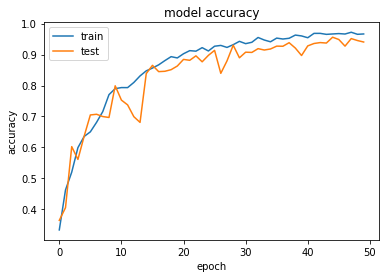

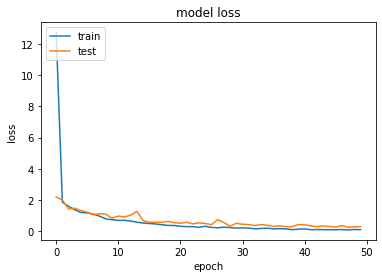

In [32]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss.png')
plt.show()

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10826, 130, 13)
(10826,)
(2707, 130, 13)
(2707,)


In [67]:
pred=model.predict(X_test)
pred_prob = model.predict_proba(X_test)

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [36]:
fpr = {}
tpr = {}
thresh ={}

n_class=19

In [37]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

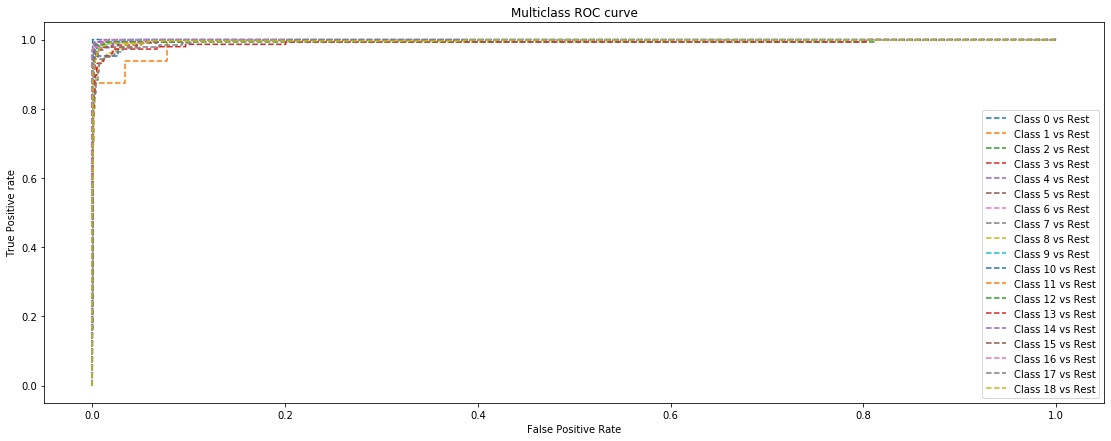

In [47]:
plt.figure(figsize=(19,7))

for i in range(0,n_class):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    
plt.savefig('Multiclass ROC',dpi=300);    


In [41]:
auc = roc_auc_score(y_test, pred_prob,multi_class="ovo")
print('AUC: %.3f' % auc)

AUC: 0.998


In [50]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [54]:
f1 = f1_score(y_test, preds)

TypeError: f1_score() got an unexpected keyword argument 'multi_class'

In [44]:
precision = {}
recall = {}
thresholds ={}

In [45]:
for i in range(n_class):    
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test, pred_prob[:,i], pos_label=i)

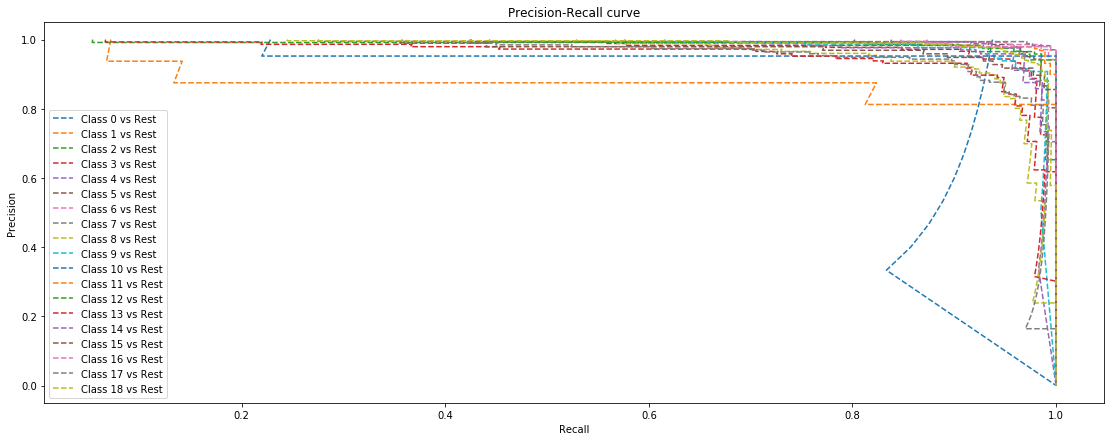

In [53]:
plt.figure(figsize=(19,7))

for i in range(0,n_class):
    plt.plot(precision[i], recall[i], linestyle='--', label='Class {} vs Rest'.format(i))

    plt.title('Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='best')
    
plt.savefig('Multiclass Precision-Recall',dpi=300);    


In [62]:
y_test

array([14, 18,  8, ..., 13, 17,  3])

In [68]:
pred=np.argmax(pred,axis=1)

In [69]:
pred

array([ 1, 18,  3, ..., 13, 13,  3], dtype=int64)

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.84      0.99      0.91       189
           2       0.99      0.94      0.96       144
           3       0.93      0.94      0.94       178
           4       0.95      0.95      0.95       169
           5       0.97      0.98      0.97       142
           6       1.00      0.94      0.97       138
           7       1.00      0.91      0.95       170
           8       0.86      0.94      0.90       176
           9       0.96      0.94      0.95       130
          10       0.91      0.95      0.93        21
          11       0.93      0.81      0.87        16
          12       0.87      0.98      0.92       119
          13       0.89      0.93      0.91       146
          14       0.97      0.92      0.94       166
          15       0.97      0.92      0.94        97
          16       1.00      0.96      0.98       195
          17       0.93    